Area (9999 samples): 502898.2898289829


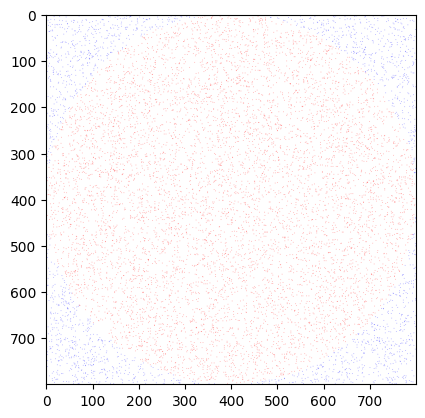

Area (99999 samples): 502590.62590625905


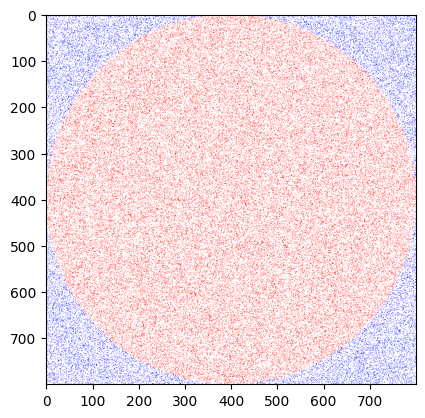

Area (150000 samples): 502592.0


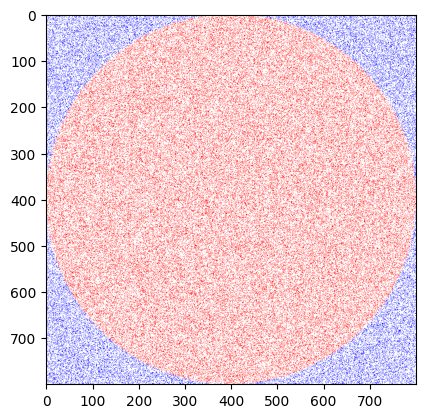

Area (999999 samples): 502568.8225688226


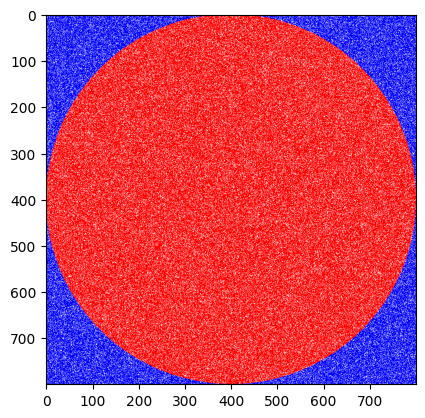

Area (1500000 samples): 502333.44


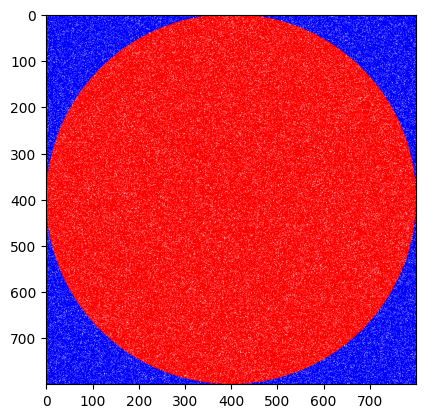

Area (9999999 samples): 502569.77825697785


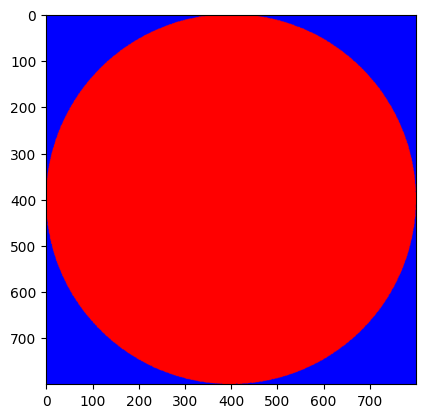

Area (reference): 502654.8245743669


In [13]:
import random
import math
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def get_random_coord(radius):
    return random.uniform(-radius, radius)

def calculate_area_monte_carlo(radius):
    diameter = radius * 2
    image = Image.new("RGB", (diameter, diameter), (255, 255, 255))
    in_colour = (255, 0, 0) # red
    out_colour = (0, 0, 255) # blue

    total_in_circle = 0

    for i in range(0, 10000000):
        (x, y) = get_random_coord(radius), get_random_coord(radius)
        in_circle = x ** 2 + y ** 2 <= radius ** 2

        if in_circle:
            total_in_circle += 1
            colour = in_colour
        else:
            colour = out_colour

        image.putpixel((math.floor(x + radius), math.floor(y + radius)), colour)

        if i in [9999, 99999, 150000, 999999, 1500000, 9999999]:
            approximate_area = (2 * radius) ** 2 * total_in_circle / i
            print(f"Area ({i} samples): {approximate_area}")
            image.save(f'circle_{i}.png')
            img = mpimg.imread(f'circle_{i}.png')
            imgplot = plt.imshow(img)
            plt.show()


def calculate_area_formula(radius):
    area = math.pi * radius ** 2
    print("Area (reference):", area)

def main():
    radius = 400
    calculate_area_monte_carlo(radius)
    calculate_area_formula(radius)

if __name__ == "__main__":
    main()